<a href="https://www.kaggle.com/code/ortaly/artist-based-recommender-system-using-word2vec?scriptVersionId=221975451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-playlists/spotify_dataset.csv
/kaggle/input/spotify-playlists/README.txt


# Artist based Recommender System using Word2Vec 

### Visit my [github's repo](http://https://github.com/ortall0201/Word2Vec_Spotify_Recommender_System) for additional info regarding handling outliers and tokens creation, modification and making the code computational power efficient (fast running of the model on CPU).

### EDA's were published, related to this project. Follow my work published on kaggle.

### For Kaggle i needed to upload my train tokens (after 80-20 train-test token split) to google cloud. This provides better way to showcase and access the corresponding files for this training.

## This is experiment num.3 (out of 5) training -> the best working model so far.

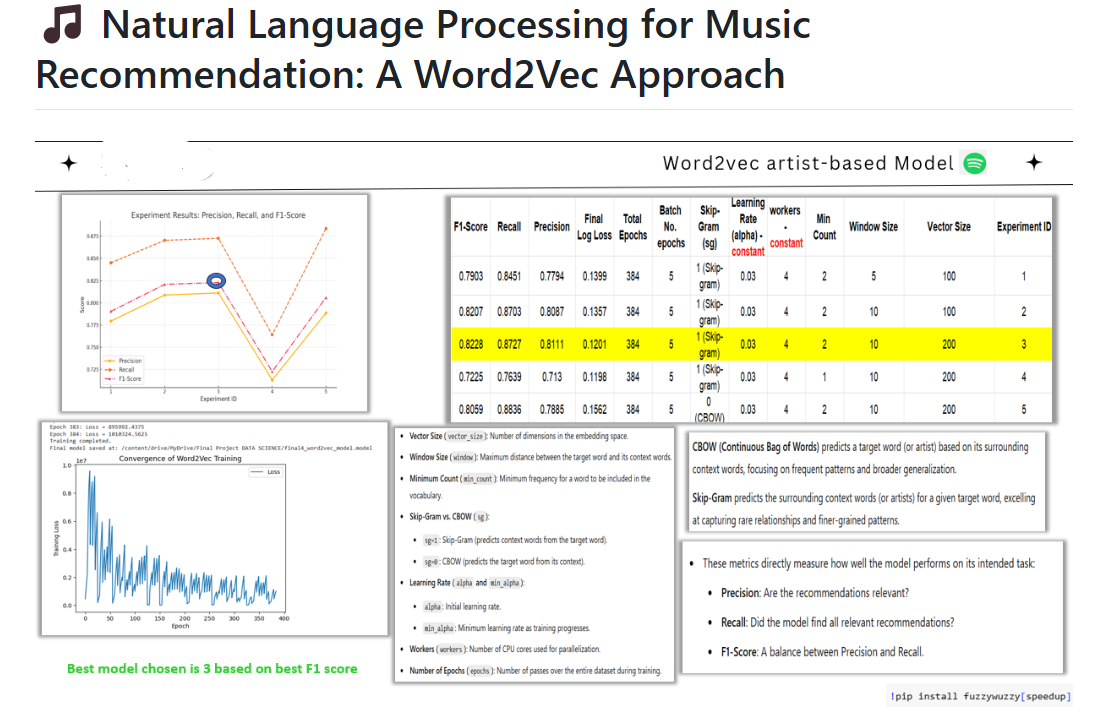

## Loading 500MB files from google cloud, for training in kaggle (a bit different from jupiter, because of kaggle's limit of size) :

In [17]:
!pip install google-cloud-storage


In [18]:
import requests

# Example file URL (replace with your actual file URL)
url = "https://storage.googleapis.com/500mb_train_zips/500MB_train_zips-20250209T131715Z-001.zip"
output_file = "/kaggle/working/500MB_train_zips.zip"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully: {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully: /kaggle/working/500MB_train_zips.zip


In [19]:
import requests

# Example file URL (replace with your actual file URL)
url = "https://storage.googleapis.com/500mb_train_zips/500MB_train_zips-20250209T131715Z-002.zip"
output_file = "/kaggle/working/500MB_train_zips.zip"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully: {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully: /kaggle/working/500MB_train_zips.zip


In [20]:
import requests

# Example file URL (replace with your actual file URL)
url = "https://storage.googleapis.com/500mb_train_zips/500MB_train_zips-20250209T131715Z-003.zip"
output_file = "/kaggle/working/500MB_train_zips.zip"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully: {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully: /kaggle/working/500MB_train_zips.zip


In [21]:
import requests

# Example file URL (replace with your actual file URL)
url = "https://storage.googleapis.com/500mb_train_zips/500MB_train_zips-20250209T131715Z-004.zip"
output_file = "/kaggle/working/500MB_train_zips.zip"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully: {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully: /kaggle/working/500MB_train_zips.zip


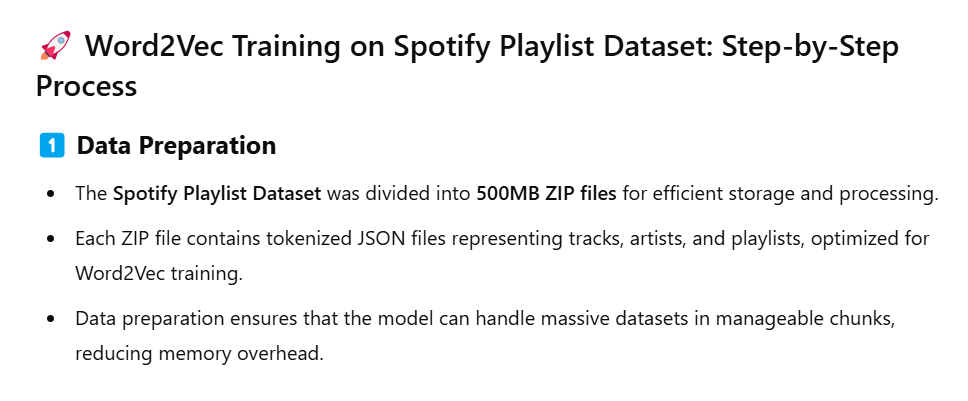

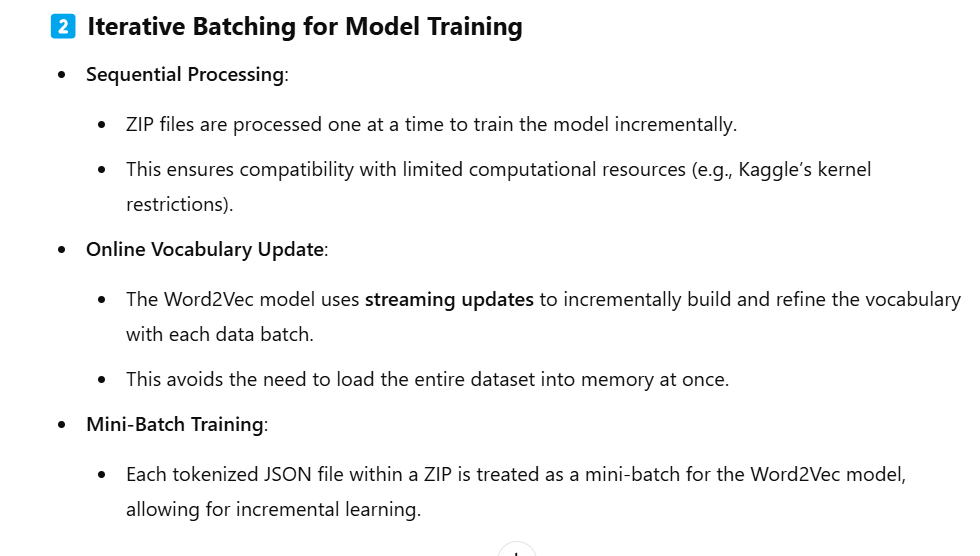

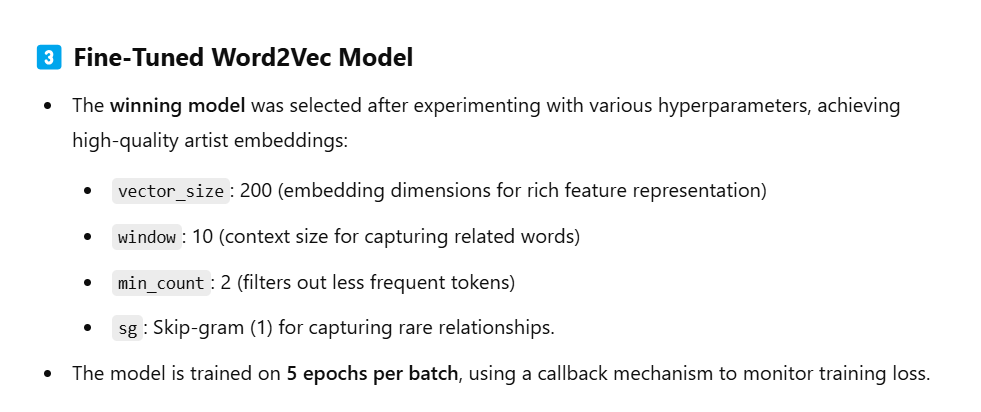

## Training the model word2vec:

## For full notebook go to my github, find the link in the above section.

Extracting the main ZIP file...
Main ZIP file extracted to: /kaggle/working/500mb_train_zips_extracted
Initializing a new Word2Vec model...
Starting training...
Entering subdirectory: /kaggle/working/500mb_train_zips_extracted/500MB_train_zips
Processing ZIP file: /kaggle/working/500mb_train_zips_extracted/500MB_train_zips/chunked_zip_18.zip...
  Loading JSON file: artist_tokens_chunk_modified_3_chunk_1.json...
  Building vocabulary...
  Training model on current batch...
Epoch 0: Loss = 6508075.0000
Epoch 1: Loss = 8966912.0000
Epoch 2: Loss = 10378347.0000
Epoch 3: Loss = 11156145.0000
Epoch 4: Loss = 11955751.0000
  Loading JSON file: artist_tokens_chunk_modified_3_chunk_2.json...
  Updating vocabulary...
  Training model on current batch...
Epoch 5: Loss = 4666428.5000
Epoch 6: Loss = 6658389.0000
Epoch 7: Loss = 7914164.0000
Epoch 8: Loss = 8577087.0000
Epoch 9: Loss = 9101538.0000
  Loading JSON file: artist_tokens_chunk_modified_3_chunk_3.json...
  Updating vocabulary...
  Train

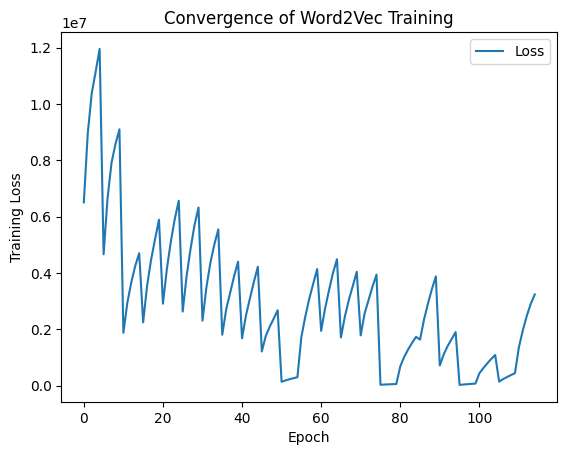

In [22]:
import os
import zipfile
import json
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt


# Paths
main_zip_file = '/kaggle/working/500MB_train_zips.zip'  # Main ZIP file path
train_zips_dir = '/kaggle/working/500mb_train_zips_extracted'  # Directory for extracted ZIPs
final_model_path = '/kaggle/working/final4_word2vec_model.model'  # Path to save the final trained model

# Ensure the directory for extracted ZIPs exists
os.makedirs(train_zips_dir, exist_ok=True)

# Extract the main ZIP file
print("Extracting the main ZIP file...")
with zipfile.ZipFile(main_zip_file, 'r') as zip_ref:
    zip_ref.extractall(train_zips_dir)
print(f"Main ZIP file extracted to: {train_zips_dir}")

# Parameters for Word2Vec
word2vec_params = {
    'vector_size': 200,  # Embedding dimensions
    'window': 10,         # Context window size
    'min_count': 2,      # Minimum word frequency
    'workers': 4,        # Number of CPU cores for parallelization
    'sg': 1,             # Skip-gram method (set to 0 for CBOW)
}

# Custom LossLogger callback to track and log loss
class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        self.losses.append(loss)
        print(f"Epoch {self.epoch}: Loss = {loss:.4f}")
        self.epoch += 1

loss_logger = LossLogger()

# Initialize a new Word2Vec model
print("Initializing a new Word2Vec model...")
model = Word2Vec(**word2vec_params)

# Recursive function to process directories
def process_directory(directory):
    for item in sorted(os.listdir(directory)):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):
            # If it's a directory, process it recursively
            print(f"Entering subdirectory: {item_path}")
            process_directory(item_path)
        elif zipfile.is_zipfile(item_path):
            # If it's a ZIP file, process its contents
            print(f"Processing ZIP file: {item_path}...")
            with zipfile.ZipFile(item_path, 'r') as zip_ref:
                for json_file in sorted(zip_ref.namelist()):
                    print(f"  Loading JSON file: {json_file}...")
                    with zip_ref.open(json_file) as f:
                        tokens = json.load(f)

                    # Build or update the vocabulary
                    if not model.wv.key_to_index:
                        print("  Building vocabulary...")
                        model.build_vocab(tokens)
                    else:
                        print("  Updating vocabulary...")
                        model.build_vocab(tokens, update=True)

                    # Train the model
                    print("  Training model on current batch...")
                    model.train(
                        tokens,
                        total_examples=model.corpus_count,
                        epochs=5,
                        compute_loss=True,
                        callbacks=[loss_logger]
                    )

# Start processing the extracted directory
print("Starting training...")
process_directory(train_zips_dir)

print("Training completed.")

# Save the final model
model.save(final_model_path)
print(f"Final model saved at: {final_model_path}")

# Visualize the loss values
plt.plot(loss_logger.losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Convergence of Word2Vec Training')
plt.legend()
plt.show()
